<a href="https://colab.research.google.com/github/anantaYSR/APD/blob/main/Kelompok1_A1_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                           Image Processing 5 Hewan Mamalia

                                                       Kelompok 1 
                                                      Kelas A1 2021
⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅
#####Anggota Kelompok :
#####Bayu Abdurosyid - 2109106003
#####Alif Maulana Setyawan  - 2109106002
#####Ananta Yusra Putra.A - 2109106024


In [51]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import shutil
import subprocess as sbp
import pathlib
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
import pandas as pd
import os

from tensorflow.keras import utils
from google.colab import files
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
!gdown 1XoQ89zByrMdTdsq2D9Z63o9X9V1LkDca

Downloading...
From: https://drive.google.com/uc?id=1XoQ89zByrMdTdsq2D9Z63o9X9V1LkDca
To: /content/dataset.zip
100% 935M/935M [00:04<00:00, 212MB/s]


In [54]:
!unzip '/content/dataset.zip' 

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset/HORSE/images521.jpg  
  inflating: dataset/HORSE/images522.jpg  
  inflating: dataset/HORSE/images523.jpg  
  inflating: dataset/HORSE/images524.jpg  
  inflating: dataset/HORSE/images525.jpg  
  inflating: dataset/HORSE/images526.jpg  
  inflating: dataset/HORSE/images527.jpg  
  inflating: dataset/HORSE/images528.jpg  
  inflating: dataset/HORSE/images529.jpg  
  inflating: dataset/HORSE/images530.jpg  
  inflating: dataset/HORSE/images531.jpg  
  inflating: dataset/HORSE/images532.jpg  
  inflating: dataset/HORSE/images533.jpg  
  inflating: dataset/HORSE/images534.jpg  
  inflating: dataset/HORSE/images535.jpg  
  inflating: dataset/HORSE/images536.jpg  
  inflating: dataset/HORSE/images537.jpg  
  inflating: dataset/HORSE/images538.jpg  
  inflating: dataset/HORSE/images539.jpg  
  inflating: dataset/HORSE/images540.jpg  
  inflating: dataset/HORSE/images541.jpg  
  inflating: dataset/HORSE/images542.j

In [55]:
#%rm -rf '/content/dataset'

In [56]:
class_names = ['elephant', 'horse', 'lion', 'cat', 'dog']

In [57]:
dir = '/content/dataset'
os.listdir(dir)

['HORSE', 'ELEPHANT', 'cat', 'LION', 'dog']

In [60]:
splitfolders.ratio(dir, output = dir, ratio = (.8, .2))
train_dir = os.path.join(dir, 'train')
validation_dir = os.path.join(dir, 'val')


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.48 files/s]
Copying files: 145 files [00:00, 564.11 files/s]
Copying files: 351 files [00:00, 1099.18 files/s]
Copying files: 510 files [00:00, 1195.16 files/s]
Copying files: 649 files [00:00, 1036.88 files/s]
Copying files: 768 files [00:00, 885.99 files/s] 
Copying files: 873 files [00:00, 925.14 files/s]
Copying files: 1011 files [00:01, 1024.30 files/s]
Copying files: 1135 files [00:01, 1081.14 files/s]
Copying files: 1278 files [00:01, 1167.93 files/s]
Copying files: 1459 files [00:01, 1347.15 files/s]
Copying files: 1600 files [00:01, 1313.04 files/s]
Copying files: 1792 files [00:01, 1482.95 files/s]
Copying files: 2110 files [00:01, 1900.77 files/s]
Copying files: 2302 files [00:01, 1718.17 files/s]
Copying files: 2488 files [00:01, 1754.77 files/s]
Copying files: 2770 files [00:02, 2045.19 files/s]
Copying files: 2980 files [00:02, 2026.47 files/s]
Copying files: 3332 files [00:02, 2437.28 files/s]
C

### Sebelum Aigmentasi

In [61]:
w = 64
h = 64

datagenbefore = ImageDataGenerator(
    rescale = 1./255
)
train_before = datagenbefore.flow_from_directory(
    '/content/dataset/train',
    class_mode='categorical',
    subset = 'training',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.


In [62]:
elephant = 0
horse = 0
lion = 0
cat = 0
dog = 0

array =  [ 
          '/content/dataset/ELEPHANT', 
          '/content/dataset/HORSE', 
          '/content/dataset/LION', 
          '/content/dataset/cat', 
          '/content/dataset/dog'
          ]

for path in os.scandir(array[0]):
  if path.is_file():
    elephant += 1
for path in os.scandir(array[1]):
  if path.is_file():
    horse += 1
for path in os.scandir(array[2]):
  if path.is_file():
    lion += 1
for path in os.scandir(array[3]):
  if path.is_file():
    cat += 1
for path in os.scandir(array[4]):
  if path.is_file():
    dog += 1

print('file count:', elephant)
print('file count:', horse)
print('file count:', lion)
print('file count:', cat)
print('file count:', dog)

animal = ['elephant', 'horse', 'lion', 'cat', 'dog']
count = [elephant, horse, lion, cat, dog]

file count: 3039
file count: 3009
file count: 2984
file count: 3037
file count: 2927


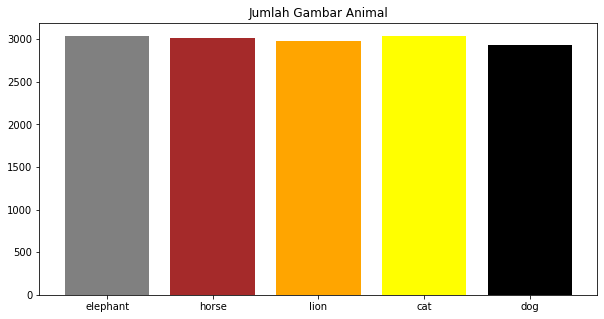

In [63]:
x = animal
y = count

plt.figure(figsize = (10,5))
plt.bar(x, y, color=['gray', 'brown', 'orange', 'yellow', 'black'])
plt.title("Jumlah Gambar Animal")
# plt.legend
plt.show()

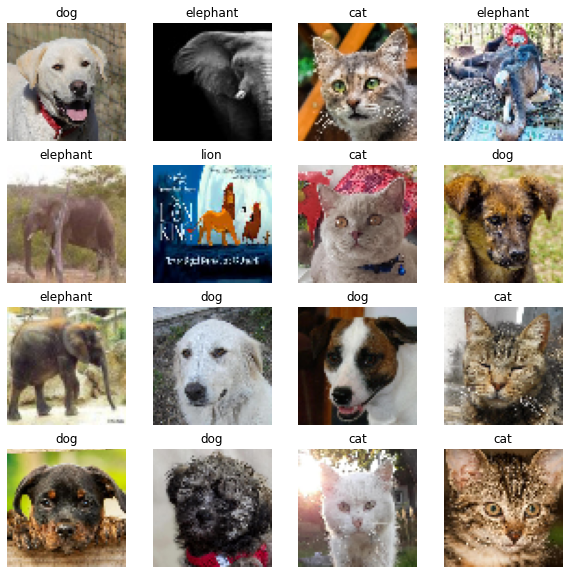

In [64]:
plt.figure(figsize=(10, 10))

images, labels = train_before.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_before[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

### Augmentasi Gambar

In [65]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
)

In [66]:
w = 150
h = 150

train_dataset = datagen.flow_from_directory(
    '/content/dataset/train',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    '/content/dataset/val',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


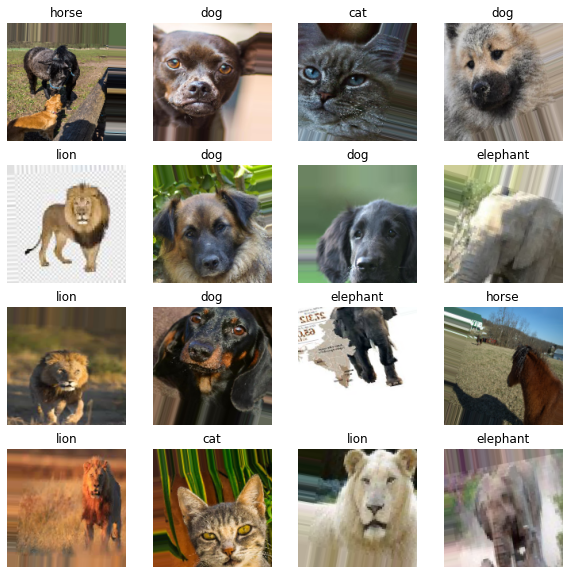

In [67]:
plt.figure(figsize=(10, 10))

images, labels = train_dataset.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

In [68]:
model = Sequential(
    [
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
    ]
)

In [69]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)      

In [70]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epocj, logs = None):
    if (logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
      print('Akurasi telah mencapai 98%!')
      self.model.stop_training = True

In [71]:
# steps_per_epoch = len(train_dataset)//batch_size

# validation_steps = len(validation_data)//batch_size

In [72]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 30,
    callbacks = [callback()]    
)

Epoch 1/30
47/47 [==============================] - 125s 3s/step - loss: 1.5790 - accuracy: 0.2832 - val_loss: 1.4906 - val_accuracy: 0.3242
Epoch 2/30
47/47 [==============================] - 117s 2s/step - loss: 1.3815 - accuracy: 0.4085 - val_loss: 1.3240 - val_accuracy: 0.4734
Epoch 3/30
47/47 [==============================] - 121s 3s/step - loss: 1.2497 - accuracy: 0.4869 - val_loss: 1.1978 - val_accuracy: 0.5234
Epoch 4/30
47/47 [==============================] - 121s 3s/step - loss: 1.0798 - accuracy: 0.5604 - val_loss: 1.0133 - val_accuracy: 0.5922
Epoch 5/30
47/47 [==============================] - 113s 2s/step - loss: 0.9732 - accuracy: 0.6116 - val_loss: 0.8612 - val_accuracy: 0.6703
Epoch 6/30
47/47 [==============================] - 110s 2s/step - loss: 0.8712 - accuracy: 0.6556 - val_loss: 0.8464 - val_accuracy: 0.6641
Epoch 7/30
47/47 [==============================] - 111s 2s/step - loss: 0.7731 - accuracy: 0.6893 - val_loss: 0.7661 - val_accuracy: 0.6922
Epoch 8/30
47

In [73]:
# saving and loading the .h5 model
 
# save model
model.save('gfgModel.h5')
print('Model Saved!')

Model Saved!


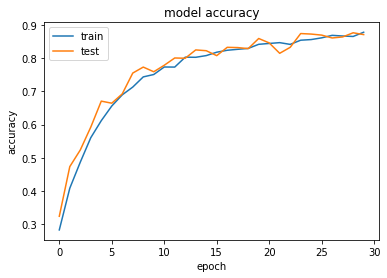

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

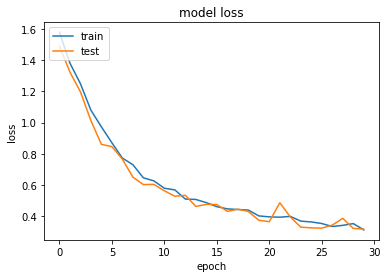

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
model.evaluate(validation_dataset)

12/12 [==============================] - 25s 2s/step - loss: 0.3137 - accuracy: 0.8800


[0.3136769235134125, 0.8799999952316284]

In [ ]:
new_model = tf.keras.models.load_model('gfgModel.h5')
new_model.predict(train_dataset[0][0])

In [ ]:
gambar = files.upload()

for dir in gambar.keys():

    img = image.load_img(dir, target_size = (w, h))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = py.expand_dims(x, axis = 0)

    img = utils.load_img(
        dir, target_size = (w, h)
    )

    img_array = utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("{}" .format(class_names[py.argmax(score)]))